In [31]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    obj = (-2*x[0]-3*x[1]+2)**2 + x[0]**2 + (x[1]-1)**2
    return obj

def gradient(x):
    g = np.array([10*x[0]+12*x[1]-8,
                12*x[0]+20*x[1]-14]).reshape(2,1)
    return g

def inexact_linesearch(x,alpha,t=0.5):
    g = gradient(x)
    counter1 = 1
    phi = f(x) - t*np.matmul(g.T,g)*alpha
    while f(x-alpha*g) > phi and counter1 < 20:
        alpha = t*alpha
        counter1 = counter1  + 1
        phi = f(x) - t*np.matmul(g.T,g)*alpha
        # print(alpha)
        # print(f(x-alpha*g)> phi)
    return alpha


def gradient_decent(x0,H,tol=10**-3,exact_line=True,t=0.5):
    x = x0
    g = gradient(x)
    counter = 0
    sol = []
    while abs(g[0]) > tol and abs(g[1]) > tol and counter < 100:
        alpha = 1
        counter = counter + 1
        if exact_line:
            alpha = np.matmul(g.T,g)/np.matmul(np.matmul(g.T,H),g)
        else:
            alpha = inexact_linesearch(x,alpha,t)
            
        x = x - alpha*g
        g = gradient(x)
        sol.append(f(x))
        print("Iteration {}:\nat x_2 = {} and x_3 = {}\ngradient values: {}\nobjective value = {}\n".format(counter,x[0],x[1],g.T,f(x)))
    plt.plot((np.abs(sol-sol[-1])))
    plt.yscale('log')
    plt.ylabel('log|f(k) - f*|')
    plt.xlabel("iteration (k)")
    plt.show()
    return x, sol

def newton_method(x0,H,tol=10**-3,t=0.5,alpha_i=1,inexact_search=False):
    x = x0
    g = gradient(x)
    counter = 0
    sol = []
    while abs(g[0]) > tol and abs(g[1]) > tol:
        alpha = alpha_i
        counter = counter + 1
        if inexact_search:
            alpha = inexact_linesearch(x,alpha,t)
        x = x - alpha*np.linalg.inv(H)@g
        g = gradient(x)
        sol.append(f(x))
        print("Iteration {}:\nat x_2 = {} and x_3 = {}\ngradient values: {}\nobjective value = {}\n".format(counter,x[0],x[1],g.T,f(x)))
    plt.plot((np.abs(sol-sol[-1])))
    plt.yscale('log')
    plt.ylabel('|f(k) - f*|')
    plt.xlabel("iteration (k)")
    plt.show()
    return x, sol

Iteration 1:
at x_2 = [-21.9375] and x_3 = [21.0625]
gradient values: [[ 25.375 144.   ]]
objective value = [1183.48046875]

Iteration 2:
at x_2 = [-22.73046875] and x_3 = [16.5625]
gradient values: [[-36.5546875  44.484375 ]]
objective value = [763.82319641]

Iteration 3:
at x_2 = [-18.16113281] and x_3 = [11.00195312]
gradient values: [[-57.58789062 -11.89453125]]
objective value = [458.12998676]

Iteration 4:
at x_2 = [-14.56188965] and x_3 = [11.74536133]
gradient values: [[-12.67456055  46.16455078]]
objective value = [344.42247005]

Iteration 5:
at x_2 = [-13.76972961] and x_3 = [8.8600769]
gradient values: [[-39.37637329  -2.03521729]]
objective value = [260.143296]

Iteration 6:
at x_2 = [-11.30870628] and x_3 = [8.98727798]
gradient values: [[-13.23972702  30.04108429]]
objective value = [197.17975905]

Iteration 7:
at x_2 = [-10.48122334] and x_3 = [7.10971022]
gradient values: [[-27.49571085   2.41952419]]
objective value = [149.85232302]

Iteration 8:
at x_2 = [-7.04425949]

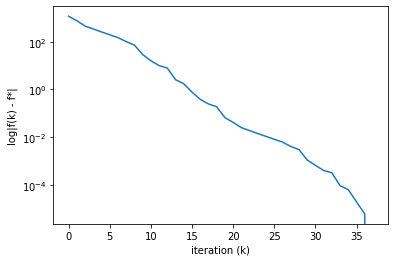

In [32]:
H = np.array([[10,12],[12,20]])

x0 = np.array([-5, 50]).reshape(2,1)

x, sol1 = gradient_decent(x0,H,exact_line=False,t=0.5)
